# Data Analysis (part 6)

## How have things changed over time?


In [1]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly_express as px
import math
import plotly

In [2]:
# loading the cleaned data back in 
comm_revs_df2 = pd.read_csv('../data/clean_data/comm_revs_df2')

comm_nosummer = comm_revs_df2[comm_revs_df2['Semester'].str.contains("A|C")]

Grouping by semester and calculating means:

In [3]:
comm_means = comm_nosummer.groupby('Semester').mean().reset_index()
comm_means2 = comm_means.drop(columns=['level','Section','hundred'])

In [4]:
comm_means2

,Semester,CourseQuality,InstructorQuality,Difficulty,AmountLearned,WorkRequired,StimulateInterest,InstructorAccess,CommAbility,ReadingsValue,TAQuality,RecommendMajor,RecommendNonMajor,num_reviewers,num_students
0,2002A,2.803684,3.074211,2.326842,2.737368,2.437895,2.720526,3.169474,3.086316,2.645263,NaN,3.262632,2.297368,34.631579,45.578947
1,2002C,2.824118,3.115882,2.357059,2.794706,2.570000,2.728235,3.106471,3.053529,2.594118,NaN,3.159412,2.277059,33.117647,38.764706
2,2003A,2.802143,3.070714,2.395000,2.825714,2.452857,2.810000,2.958571,3.119286,2.484286,NaN,3.207143,2.439286,31.571429,44.142857
3,2003C,2.871765,3.228824,2.219412,2.829412,2.384118,2.898235,3.141765,3.134118,2.508235,NaN,3.300588,2.357647,34.176471,43.235294
4,2004A,3.001429,3.232857,2.417857,2.920000,2.470000,2.945000,3.007857,3.241429,2.645000,NaN,3.263571,2.456429,45.214286,57.142857
5,2004C,3.067059,3.330588,2.402353,2.999412,2.517059,2.982941,3.166471,3.295882,2.662353,NaN,3.429412,2.585882,36.941176,47.000000
6,2005A,2.908125,3.189375,2.492500,2.828750,2.551250,2.942500,3.044375,3.171875,2.578750,NaN,3.241250,2.405000,32.937500,41.750000
7,2005C,2.900588,3.204118,2.459412,2.818824,2.475294,2.881176,3.189412,3.126471,2.475882,NaN,3.237059,2.114118,42.352941,50.411765
8,2006A,2.980000,3.265000,2.431250,2.895625,2.556875,2.917500,3.130000,3.256250,2.626250,NaN,3.245000,2.324375,37.375000,47.562500
9,2006C,3.024375,3.337500,2.488125,2.948750,2.640000,3.067500,3.225625,3.313125,2.576875,NaN,3.388125,2.469375,40.375000,52.500000


This would be easier to digest in a visualization:

Text(0.5, 0, 'Semester')

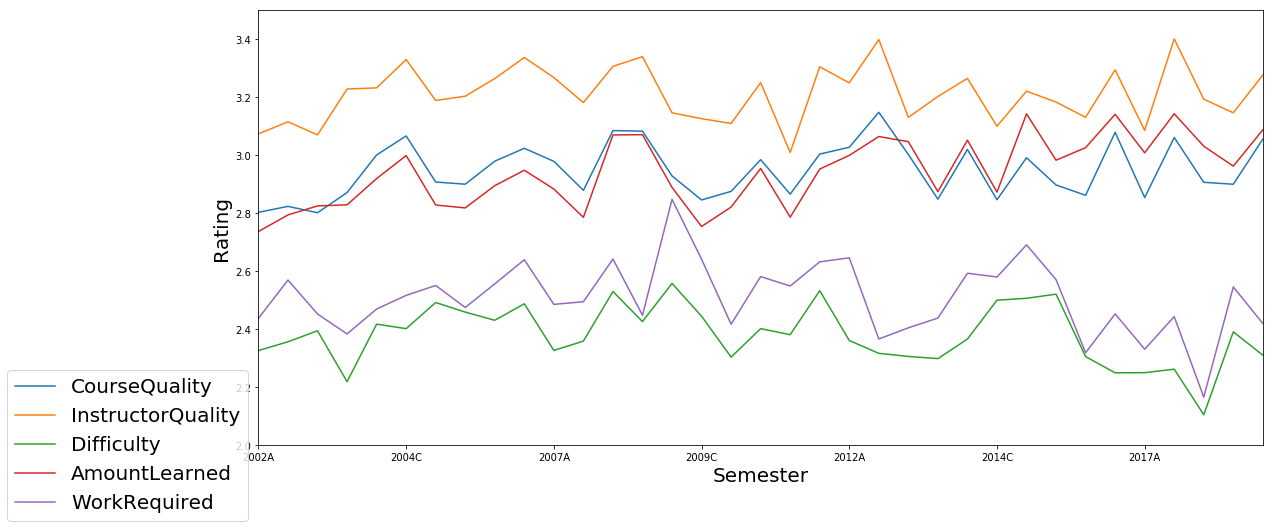

In [5]:
plot4 = comm_means2.plot(x='Semester', y=['CourseQuality', 'InstructorQuality', 'Difficulty', 'AmountLearned', 'WorkRequired'],
                      ylim=(2,3.5),figsize=(18,8))
plt.legend(bbox_to_anchor=(0, 0), loc='right', ncol=1,prop={'size': 20})
plt.ylabel("Rating",fontsize=20)
plt.xlabel("Semester",fontsize=20)
#we can see which variables are intertwined

#### A few things stand out from this visualization:
* There is a general order for how COMM courses are rated, with average instructor quality the highest, and difficulty at the bottom.
* Until about the years 2012-2013, course qualities were on average higher, but since then amount learned has become higher
* Certain pairs of variables clearly "follow" each other's peaks and valleys - course quality and amount learned follow each other very closely, and difficulty and work required follow each other

Saving to visualizations sub-folder:

In [6]:
fig4 = plot4.get_figure()
fig4.savefig('../data_analysis/visualizations/Ratings_over_time.png', bbox_inches="tight")
#added the bbox_inches="tight" argument to prevent cutting off the legend